Implementation of regularized linear regression with Python's numpy package.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat

In [3]:
data = loadmat("ex5data1.mat")
data

{'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]), 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-12.76686065],
        [ 34.05450539],
        [ 39.22350028],
        [  1.97449674],
        [ 29.6217551 ],
        [-23.66962971],
        [ -9.01180139],
        [-55.94057091],
        [-35.70859752],
        [  9.51020533]]), 'Xval': array([[-16.74653578],
        [-14.57747075],
        [ 34.51575866],
        [-47.01007574],
        [ 36.97511905],
        [-40.68611002],
        [ -4.47201098],
        [ 26.533

In [7]:
Xtest, Xval, X, yval, ytest, y  = data["Xtest"], data["Xval"], data["X"], data['yval'], data['ytest'], data['y']

In [10]:
print Xtest.shape, Xval.shape, X.shape, yval.shape, ytest.shape, y.shape

(21L, 1L) (21L, 1L) (12L, 1L) (21L, 1L) (21L, 1L) (12L, 1L)


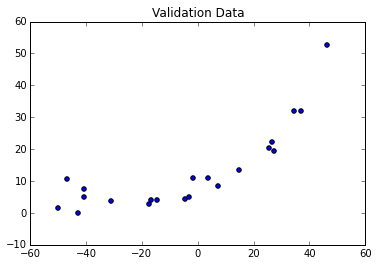

In [14]:
plt.scatter(Xval, yval)
plt.title("Validation Data")

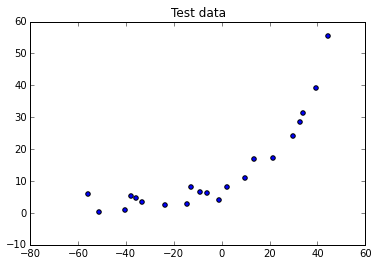

In [15]:
plt.scatter(Xtest, ytest)
plt.title("Test data")

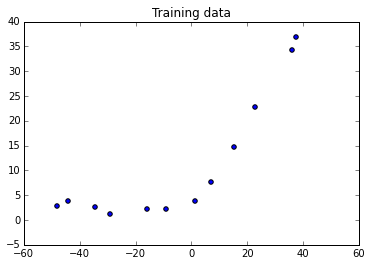

In [16]:
plt.scatter(X, y)
plt.title("Training data")

In [44]:
theta = np.array([1.0, 1.0])
print theta.shape

(2L,)


In [35]:
#Cost function with regularization term
def cost(theta, X, y, lamb):
    theta, X, y = np.matrix(theta), np.matrix(X), np.matrix(y)
    m = float(len(X))
    first = np.multiply((X*theta.T - y), (X*theta.T -y))
    return 1.0/(2.0*m)*np.sum(first) + lamb/(2.0 * m) * np.sum(np.power(theta[:, 1:theta.shape[1]], 2))

In [41]:
rows = np.shape(X)[0]
X = np.insert(X, 0, np.ones(rows), axis=1)

In [47]:
Xval = np.insert(Xval, 0, np.ones(np.shape(Xval)[0]), axis = 1)
Xtest = np.insert(Xtest, 0, np.ones(np.shape(Xtest)[0]), axis = 1)

In [50]:
print cost(theta, X, y, 1.0)
print cost(theta, Xval, yval, 1.0)
print cost(theta, Xtest, ytest, 1.0)

303.99319222
344.674624534
342.402951355


In [55]:
def gradient(theta, X, y, lamb):
    theta, X, y = np.matrix(theta), np.matrix(X), np.matrix(y)
    m = float(len(X))
    errors = X * theta.T - y
    
    grad = (1.0 / m * X.T * errors).T + ( (lamb / m)*theta)
    grad[0, 0] = np.sum(np.multiply(errors, X[:, 0]))/m #intercept not regularized
    return np.array(grad).ravel()

In [56]:
gradient(theta, X, y, 1.0)

array([ -15.30301567,  598.25074417])

In [191]:
def gradReg(X, y, theta, lamb, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    costs = []
    m = float(len(X))
    
    for i in xrange(iters):
        temp = theta - alpha/m * gradient(theta, X, y, lamb)
        costs.append(cost(theta, X, y, lamb))
        theta = temp
    return theta, costs

In [195]:
weights, costs = gradReg(X, y, np.array([1.0, 1.0]), 1.0, 0.01, 7000)
weights

array([ 13.04553729,   0.36748907])

In [57]:
from scipy.optimize import minimize

In [58]:
def linreg(X, y, lamb):
    params = X.shape[1]
    theta = np.zeros(params)
    fmin = minimize(fun=cost, x0=theta, args=(X, y, lamb), method="TNC", jac=gradient)
    return fmin.x

In [193]:
lparams = linreg(X, y, 1.0)
print lparams

[ 13.08771416   0.367742  ]


In [77]:
def ridge(X, y, lamb):
    XtX = np.linalg.inv(np.dot(X.T, X) + lamb*np.identity(int(X.shape[1])))
    return np.dot(np.dot(XtX, X.T), y)

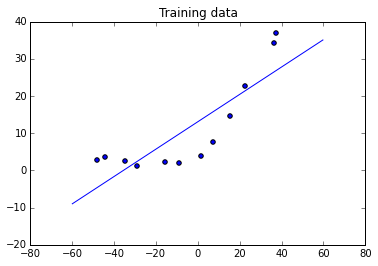

In [156]:
xs = np.arange(-60, 60, 0.25)
xs = np.column_stack((np.ones(len(xs)), xs))
ys = np.dot(xs, lparams)
plt.scatter(X[:, 1], y)
plt.plot(xs[:, 1], ys)
plt.title("Training data")

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
linear = LinearRegression()

In [83]:
linear.fit(X, y)
print linear.coef_
print linear.intercept_

[[ 0.          0.36777923]]
[ 13.08790351]


In [107]:
def learning(X, y, Xcv, ycv, numexamples, lamb=1.0):
    t_error = []
    cv_error = []
    for m in numexamples:
        params = linreg(X[:m], y[:m], lamb=lamb)
        t_error.append(cost(params, X[:m], y[:m], lamb=0.0))
        cv_error.append(cost(params, Xcv, ycv, lamb=0.0))
    plt.plot(numexamples, t_error, label="Train")
    plt.plot(numexamples, cv_error, label="Cross Validation")
    plt.legend()
    plt.title("Regression Learning Curve")

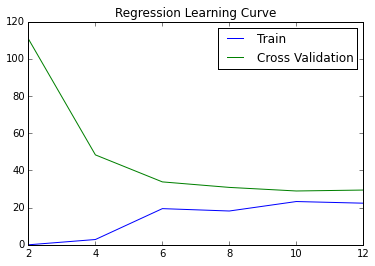

In [108]:
learning(X, y, Xval, yval, [2, 4, 6, 8, 10, 12])

In [113]:
Xscale = X.copy()
mean = Xscale[:, 1].mean()
std = Xscale[:, 1].std()
Xscale[:, 1] = (Xscale[:, 1] - mean)/std

In [124]:
X1 = np.reshape(Xscale[:, 1], (X.shape[0], 1))
for i in range(2, 9, 1):
    Xscale = np.hstack((Xscale, np.power(X1, i)))

In [129]:
Xcv_scale = Xval.copy()
mean = Xcv_scale[:, 1].mean()
std = Xcv_scale[:, 1].std()
Xcv_scale[:, 1] = (Xcv_scale[:, 1] - mean)/std
Xcv1 = np.reshape(Xcv_scale[:, 1], (Xval.shape[0], 1))
for i in range(2, 9, 1):
    Xcv_scale = np.hstack((Xcv_scale, np.power(Xcv1, i)))

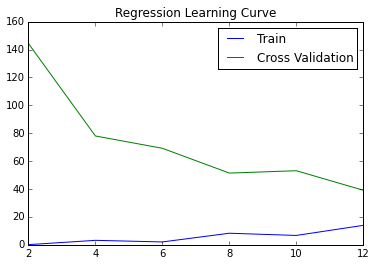

In [132]:
learning(Xscale, y, Xcv_scale, yval, [2, 4, 6, 8, 10, 12], lamb=100.0)

In [170]:
def validation(X, y, Xcv, ycv, lambdas):
    t_error = []
    cv_error = []
    for lamb in lambdas:
        params = linreg(X, y, lamb=lamb)
        t_error.append(cost(params, X, y, lamb=lamb))
        cv_error.append(cost(params, Xcv, ycv, lamb=lamb))
    plt.plot(lambdas, t_error, label="Train")
    plt.plot(lambdas, cv_error, label="Cross Validation")
    plt.xlabel("$\lambda$")
    plt.ylabel("Error")
    plt.legend()
    plt.title("Regression Validation Curve")

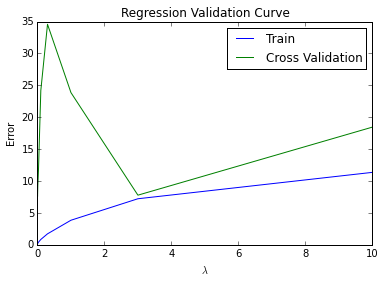

In [174]:
validation(Xscale, y, Xcv_scale, yval,[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])